# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
#from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location `~/scikit_learn_data/...`
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

NameError: name 'fetch_openml' is not defined

(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

In [4]:
#install packages as required
import sys
!conda install --yes --prefix {sys.prefix} Scikit-learn 0.20

Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - 0.20

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/osx-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/pro/osx-64
  - https://repo.anaconda.com/pkgs/pro/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




Confusion matrix, without normalization
[[105   1   0   0   0   0   0   0   0   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   0 100   0   0   0   0   4   0   1]
 [  0   1   0  92   0   1   0   2   1   0]
 [  0   0   0   0  88   0   0   1   0   3]
 [  0   0   0   1   0  84   2   0   0   1]
 [  0   1   0   0   0   1  99   0   1   0]
 [  0   0   0   0   0   0   0 102   0   0]
 [  1   1   1   3   1   1   1   0  85   0]
 [  0   1   0   0   3   0   0   0   0  91]]


NameError: name 'itertools' is not defined

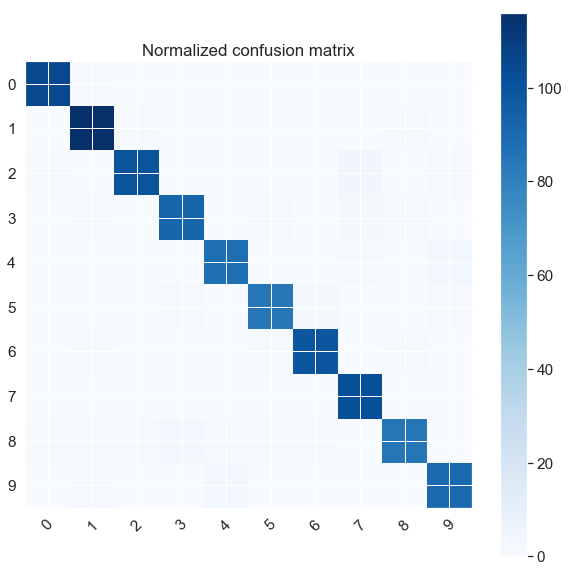

In [95]:
###    Testing 1    ###
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    

plt.figure(figsize=(10, 10))
plot_confusion_matrix(conf, classes=['0','1','2','3','4','5','6','7','8','9'], normalize=False, title='Confusion matrix')
plt.show()


In [109]:
blurred_dev = gaussian_filter(dev_data, sigma=1)
#Get accuracy using 1-NN model
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X[:n], Y[:n])
dev_predicted_labels = model.predict(blurred_dev)
correct_prediction = (dev_predicted_labels == dev_labels)
accuracy_blur2 = np.sum(correct_prediction)
print("Accuracy of preprocessing only dev data is:", accuracy_blur2,'\n')
print("Accuracy changed from base case by", accuracy_blur2 - accuracy_base)

Accuracy of preprocessing only dev data is: 625 

Accuracy changed from base case by -314


In [110]:
# (3) preprocess both training and dev data
#Get accuracy using 1-NN model
model = KNeighborsClassifier(n_neighbors=1)
model.fit(blurred_training, Y[:n])
dev_predicted_labels = model.predict(blurred_dev)
correct_prediction = (dev_predicted_labels == dev_labels)
accuracy_blur3 = np.sum(correct_prediction)
print("Accuracy of preprocessing only dev data is:", accuracy_blur3,'\n')
print("Accuracy changed from base case by", accuracy_blur3 - accuracy_base)

Accuracy of preprocessing only dev data is: 510 

Accuracy changed from base case by -429


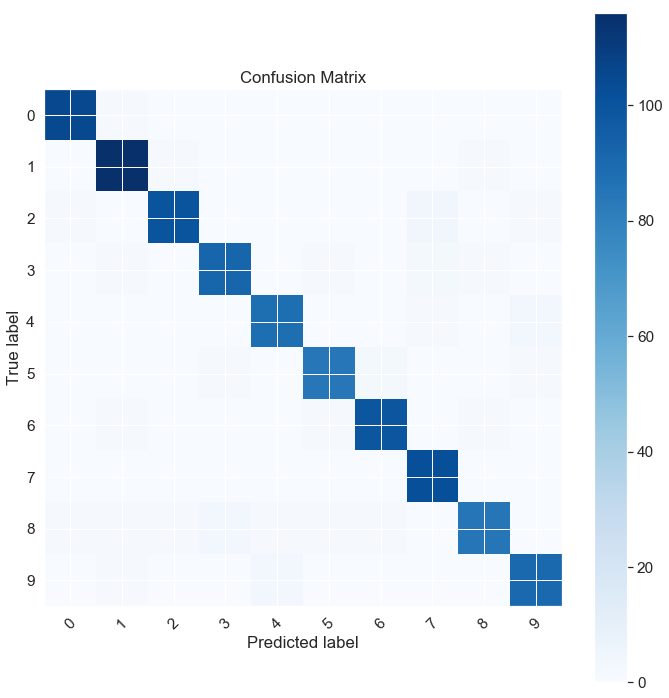

In [98]:
###    Testing 2    ###
#plot the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
classes=['0','1','2','3','4','5','6','7','8','9']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = 'd'
thresh = conf.max() / 2.

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

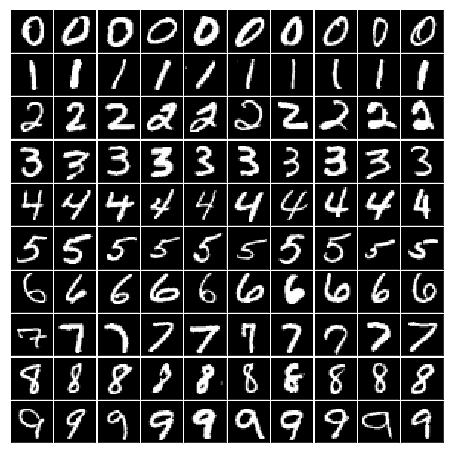

In [28]:
#def P1(num_examples=10):

### STUDENT START ###
# We'll create a subplot for each value of the degrees list.

#Figure out the indexes of Y which gives the 10 digits 10X each
#map_items tells us which position in X will give the 10 examples of 10 digits
map_items = {'0':[], '1':[], '2':[],'3':[], '4':[], '5':[], '6':[], '7':[], '8':[], '9':[]}

for i in ['0','1','2','3','4','5','6','7','8','9']:
    j = 0
    while len(map_items[i]) < num_examples:
        if Y[j] == i:
            map_items[i].append(j)
        j = j + 1

#set up dimensions of plot        
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Iterate through the map_items to plot first 10 examples of each 10 digit
a = 0
for i in ['0','1','2','3','4','5','6','7','8','9']:
    for j in range(num_examples):
        ax = fig.add_subplot(10, 10, a + 1, xticks=[], yticks=[])
        ax.imshow(np.reshape(X[map_items[i][j]],(28,28)), cmap='gray')
        a = a + 1
   
### STUDENT END ###

#P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [47]:
def P2(k_values):

### STUDENT START ###

    # Evaluate K-Nearest-Neighbors model using range of K values
    k_accuracy = []
    #try out the k values
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(mini_train_data, mini_train_labels)
        dev_predicted_labels = model.predict(dev_data)
        #measure accuracy
        correct_prediction = (dev_predicted_labels == dev_labels)
        #remember the various accuracies so as to compare later
        k_accuracy.append(np.sum(correct_prediction))
        print ('Number of correct predictions for k =', k, ' is ', np.sum(correct_prediction)) 

    #select the k with largest number of correct predictions on dev set
    print('K value with highest accuracy is ', k_values[k_accuracy.index(max(k_accuracy))])

    
#For k=1, show precision, recall, and F1 for each label
model = KNeighborsClassifier(n_neighbors=1)
model.fit(mini_train_data, mini_train_labels)
dev_predicted_labels = model.predict(dev_data)
print("Report for K=1", '\n')
print(classification_report(dev_labels, dev_predicted_labels))

### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Report for K=1 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Number of correct predictions for k = 1  is  884
Number of correct predictions for k = 3  is  876
Number of correct predictions for k = 5  is  882
Number of correct predictions for k = 7  is  877
Number of correct prediction

*ANSWER*: For k=1, the most difficult digit is **8** based on lowest F1 score.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [53]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    #Evaluate 1-Nearest-Neighbors model on training set of variable size train_sizes
    for tsize in train_sizes:
        #start timer to measure time elapsed
        start_time = time.time()
        #evalute KNN using K=1
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(X[:tsize], Y[:tsize])
        dev_predicted_labels = model.predict(dev_data)
        #measure accuracy
        correct_prediction = (dev_predicted_labels == dev_labels)
        print('For training size', tsize, ':')
        print('Accuracy is', np.sum(correct_prediction))
        print('Time needed is', time.time() - start_time)
        print('\n')
        accuracies.append(np.sum(correct_prediction))

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

For training size 100 :
Accuracy is 702
Time needed is 0.1966719627380371


For training size 200 :
Accuracy is 791
Time needed is 0.25141000747680664


For training size 400 :
Accuracy is 811
Time needed is 0.46926212310791016


For training size 800 :
Accuracy is 866
Time needed is 0.9499731063842773


For training size 1600 :
Accuracy is 905
Time needed is 1.837777853012085


For training size 3200 :
Accuracy is 927
Time needed is 3.5427138805389404


For training size 6400 :
Accuracy is 939
Time needed is 8.047904968261719


For training size 12800 :
Accuracy is 952
Time needed is 15.505361795425415


For training size 25000 :
Accuracy is 962
Time needed is 33.267974853515625




(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [77]:
def P4():

### STUDENT START ###

    #Fit regression model based on accuracy of various training sizes
    lr = LinearRegression(fit_intercept=True)
    lr.fit(np.reshape(train_sizes,(len(train_sizes),1)), accuracies)
    print (lr.intercept_)
    print (lr.coef_[0])
    #print out the regression model
    print ('Estimated function: y = %.2f + %.2fx0' %(lr.intercept_, lr.coef_[0]))

    #predict the time required for n=60K, in seconds
    print('Using training size of 60K, it will take ', lr.predict(np.reshape(60000,(1,1)))[0], 'seconds.')

### STUDENT END ###

P4()

834.4086553721633
0.006838061418822407
Estimated function: y = 834.41 + 0.01x0
Using training size of 60K, it will take  1244.6923405015077 seconds.


*ANSWER*: Sample size of 60K will require almost 20 minutes of processing time which is too long.

A solution is to bucket the training size values as it is a continuous variable.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [6]:
def P5():

### STUDENT START ###

    #Fit a 1-NN model using training size of 25K
    print("Evaluate 1-NN model using training size of 25K")
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X[:25000], Y[:25000])
    dev_predicted_labels = model.predict(dev_data)

    #Show confusion matrix
    conf = confusion_matrix(dev_labels, dev_predicted_labels)
    print(conf)

    #plot the confusion matrix
    plt.figure(figsize=(10, 10))
    plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    classes=['0','1','2','3','4','5','6','7','8','9']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = conf.max() / 2.

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

### STUDENT END ###

P5()

Evaluate 1-NN model using training size of 25K


NameError: name 'X' is not defined

In [ ]:
#2 are being mistaken as 7


#mistakes = (dev_predicted_labels == '7')



*ANSWER* The most confused pair is **2 mistakenly predicted as 7**.

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Illustration of Gaussian Blurring


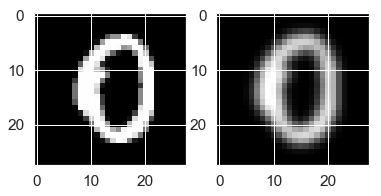

Accuracy of preprocessing only training data is: 848 

Accuracy improved over base case by -91


In [108]:
#def P6():
    
### STUDENT START ###

    #Use scipy's gaussian_filter function
    from scipy.ndimage import gaussian_filter

    #Choose training data with n=6400 for speed
    n = 6400

    # Illustrate one example of gaussian blurring
    print("Illustration of Gaussian Blurring")
    fig = plt.figure()
    plt.gray()  # show the filtered result in grayscale
    ax1 = fig.add_subplot(121)  # left side
    ax2 = fig.add_subplot(122)  # right side
    ascent = np.reshape(X[0:n][0],(28,28))
    result = gaussian_filter(ascent, sigma=1)
    ax1.imshow(ascent)
    ax2.imshow(result)
    plt.show()

    # (0) Get accuracy of base case without blurring
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X[:n], Y[:n])
    dev_predicted_labels = model.predict(dev_data)
    correct_prediction = (dev_predicted_labels == dev_labels)
    accuracy_base = np.sum(correct_prediction)


    # (1) Preprocess the training data but not the dev data

    blurred_training = gaussian_filter(X[:n], sigma=1)
    #Get accuracy using 1-NN model
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(blurred_training, Y[:n])
    dev_predicted_labels = model.predict(dev_data)
    correct_prediction = (dev_predicted_labels == dev_labels)
    accuracy_blur1 = np.sum(correct_prediction)
    print("Accuracy of preprocessing only training data is:", accuracy_blur1,'\n')
    print("Accuracy changed from base case by", accuracy_blur1 - accuracy_base, '\n')

    # (2) Preprocess the dev data but not the training data

    blurred_dev = gaussian_filter(dev_data, sigma=1)
    #Get accuracy using 1-NN model
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X[:n], Y[:n])
    dev_predicted_labels = model.predict(blurred_dev)
    correct_prediction = (dev_predicted_labels == dev_labels)
    accuracy_blur2 = np.sum(correct_prediction)
    print("Accuracy of preprocessing only dev data is:", accuracy_blur2,'\n')
    print("Accuracy changed from base case by", accuracy_blur2 - accuracy_base, '\n')


    # (3) preprocess both training and dev data
    #Get accuracy using 1-NN model
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(blurred_training, Y[:n])
    dev_predicted_labels = model.predict(blurred_dev)
    correct_prediction = (dev_predicted_labels == dev_labels)
    accuracy_blur3 = np.sum(correct_prediction)
    print("Accuracy of preprocessing only dev data is:", accuracy_blur3,'\n')
    print("Accuracy changed from base case by", accuracy_blur3 - accuracy_base)

### STUDENT END ###

#P6()

ANSWER: Gaussian blur causes loss in accuracy.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [9]:
#def P7():

### STUDENT START ###


    
### STUDENT END ###

#P7()

ANSWER:

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [10]:
#def P8(alphas):

### STUDENT START ###



### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

In [11]:
#print nb.best_params_

ANSWER:

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [12]:
#def P9():

### STUDENT END ###


### STUDENT END ###

#gnb = P9()

ANSWER:

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

In [13]:
#def P10(num_examples):

### STUDENT START ###


### STUDENT END ###

#P10(20)

ANSWER:

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [14]:
#def P11(buckets, correct, total):
    
### STUDENT START ###


                
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [15]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()